# Project: Investigating the TMDB MOVIES Dataset
## Table of Contents
<u1>
<li><a href="#intro">Introduction</a></li>
<li><a href = "#wrangling">Data Wrangling</a></li>
<li><a href = "#eda">Exploratory Data Analysis</a></li>
<li><a href = "#conclusion">Conclusion</a></li>
</u1>

<a id='intro'></a>
# Introduction
## Dataset Description
This dataset contains data for about 10000 movies, sourced from The Movie Database(TMDB).
the different columns in this dataset are:
1. "id"....this is an index numbering from 
2. "imdb_id" ....this is the original id given by the IMDB to differentiate different movies
3. "popularity".... a rating of how popular the movie is 
4. "budget" ..........the total amount of money to be spent on the movie, from production to final marketing
5. "revenue" ......the total amount of money gotten from the money, from sales, copyright etc
6.  'original_title'....the name of the movie. this helps the end users to differentiate one movie from another,
    as it is easier to pronounce compared to "imdb_id" values
7. 'cast'.......the top actors and actress in the movie set
8.  'homepage' .....the url with which one can easily download the movie online
9.  'director' ..... the person that directed the movie.
10. 'tagline' ....... a catch phrase to tell you what to expect from the movie
11. 'keywords'...... words that one can can search online, and the movie will pop out as a suggestion
12. 'overview'.....  A narration of what the movies entails
13. 'runtime' .....  the amount of time in minutes that the movie will play
14. 'genres' ....... What is the movie about?. is it Crime, science fiction, an adventure?
15. 'production_companies'........which companies are involved in the production of the movie
16. 'release_date'.........the exact date the movie was released
17. 'vote_count'........total number of votes that it received
18. 'vote_average' ......The rating of the movie, from a score of 0 to 10
19. 'release_year'  ....... the year the movie was released
20. 'budget_adj'    ...... adjusted figure for budget, putting inflation and time value of money into consideration
21. 'revenue_adj'] .......likewise, this represents the adjusted figure for revenue, putting inflation and time value of money into consideration
   


# Questions for Analysis
<u1>
    <li><a href = "#q1">Most Popular Genres</a></li>
    <li><a href = "#q2">What properties influence Revenues</a></li>
    <li><a href = "#q3">Are latest movies performing better than old releases</a></li>
    <li><a href = "#q4">Are more rated movies more successful than others</a></li>
</u1>
    
 


# Import necessary libraries and load dataset

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("tmdb-movies (1).csv")

<a id="wrangling"></a>
# data wrangling

## inspect / clean the dataset
<u1>
    <li><a href = "#qa">missing values</a></li>
    <li><a href = "#qb">duplicated values</a></li>
    <li><a href = "#qc">multicollinearity</a></li>
    <li><a href = "#qd">outlook</a></li>
    <li><a href = "#qe">cardinality</a></li>
</u1>

<a id = "qa"></a>
missing values

In [327]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

The dataset contains 10866 observations. the column containing the url of the movies, "homepage", has over 7900 missing values,
this is way above 50% of the observations, and as such, cannot provide much information for analysis. it will be dropped

In [328]:
df.drop(columns="homepage",inplace=True)

<a id="qb"></a>
Duplicated rows

In [329]:
df.duplicated().sum()

1

In [330]:
# drop the duplicates
df.drop_duplicates(inplace=True)

<a id = "qc"></a>
multicollinearity

In [331]:
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.141341,-0.099235,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.545481,0.663360,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
budget,-0.141341,0.545481,1.000000,0.734928,0.191300,0.632719,0.081067,0.115904,0.968963,0.622531
revenue,-0.099235,0.663360,0.734928,1.000000,0.162830,0.791174,0.172541,0.057070,0.706446,0.919109
runtime,-0.088368,0.139032,0.191300,0.162830,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.632719,0.791174,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.081067,0.172541,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,0.115904,0.057070,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.968963,0.706446,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.622531,0.919109,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


## drop multicollinearty high columns
from above, budget is very corelated with budget_adj, revenue is also correlated with revenue_adj. hence both will be dopped
from accounting point of view, it also makes sense to drop budget and revenue columns as the dollar value of 1965 is not same today

In [332]:
multicols = ["budget","revenue"]

In [333]:
df.drop(columns=multicols,inplace= True)

<a id = "qd"></a>
outlook

In [334]:
df.shape

(10865, 18)

In [335]:
df.head()

,id,imdb_id,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   original_title        10865 non-null  object 
 4   cast                  10789 non-null  object 
 5   director              10821 non-null  object 
 6   tagline               8041 non-null   object 
 7   keywords              9372 non-null   object 
 8   overview              10861 non-null  object 
 9   runtime               10865 non-null  int64  
 10  genres                10842 non-null  object 
 11  production_companies  9835 non-null   object 
 12  release_date          10865 non-null  object 
 13  vote_count            10865 non-null  int64  
 14  vote_average          10865 non-null  float64
 15  release_year       

<a id="qe"></a>
cardinality
the keywords column appears to have too many values. after applying str.split(), some columns have as many as 3000 unique values, as such, it can only provide very little information. hence, it shoud be dropped.

In [337]:
df.drop(columns="keywords",inplace=True)

<a id="eda"></a>
# Exploratory Data Analysis

Most Popular Genres
What properties influence Revenues
Does Genre influence revenue or budget
Does popularity equate to success for the movies


<a id ="q1"></a>


## Most Popular Genres

In [338]:
# taking a look at the contents
df["genres"].head(10)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

In [339]:
# separating contents

df["genres"].str.split("|",expand=True)

# taking a look at the different columns, they have exactly same contents, and column 0 is the only one without missing values
# hence, it will be assumed that the first entry is the principal genre

df["genres"] =df["genres"].str.split("|",expand=True)[0]

In [340]:
# how much does each genre generate
genre_series=df.groupby("genres")["revenue_adj"].sum().sort_values(ascending=False)

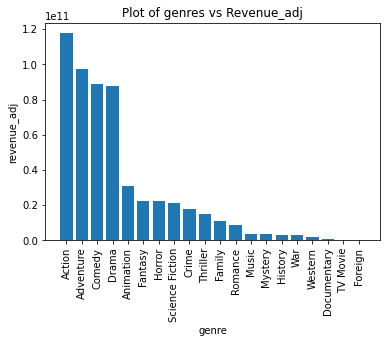

In [341]:
plt.bar(x=genre_series.index,height=genre_series.values)
plt.xlabel("genre")
plt.ylabel("revenue_adj")
plt.title("Plot of genres vs Revenue_adj")
plt.xticks(rotation=90)
plt.show()

<a id = "q2"></a>

## What properties influence Revenues

In [342]:
# for numerical columns, the factors can be gotten from 
df.corr()


,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014351,-0.088368,-0.035555,-0.058391,0.511393,-0.189008,-0.138487
popularity,-0.014351,1.000000,0.139032,0.800828,0.209517,0.089806,0.513555,0.609085
runtime,-0.088368,0.139032,1.000000,0.163273,0.156813,-0.117187,0.221127,0.175668
vote_count,-0.035555,0.800828,0.163273,1.000000,0.253818,0.107962,0.587062,0.707941
vote_average,-0.058391,0.209517,0.156813,0.253818,1.000000,-0.117576,0.093079,0.193062
release_year,0.511393,0.089806,-0.117187,0.107962,-0.117576,1.000000,0.016771,-0.066236
budget_adj,-0.189008,0.513555,0.221127,0.587062,0.093079,0.016771,1.000000,0.646627
revenue_adj,-0.138487,0.609085,0.175668,0.707941,0.193062,-0.066236,0.646627,1.000000


Those columns that have more 0.5 correlation with the revenue_adj column are more influential than others
these are
1."popularity"
2."vote_count"
3."budget_adj"

In [355]:
# in order to preserve the original dataframe, a new one will be made
df_cat=df.copy()

# remove numeric columns from df_cat
numeric = []
for j in df_cat.columns:
    if df_cat[j].dtype!="object":
        numeric.append(j)
df_cat.drop(columns=numeric,inplace=True)


In [358]:
# for categorical columns
categorical = []
for i in df_cat.columns:
    categorical.append(i)
from sklearn.preprocessing import LabelEncoder
trans = LabelEncoder()
for column in categorical:
    df_cat[column] = trans.fit_transform(df_cat[column])

# adding revenue_adj to df_cat
df_cat["revenue_adj"] = df["revenue_adj"]

In [360]:
df_cat.corr()



,imdb_id,original_title,cast,director,tagline,overview,genres,production_companies,release_date,revenue_adj
imdb_id,1.000000,-0.030938,-0.020126,-0.026509,0.117902,-0.011251,0.119054,-0.022780,0.025158,-0.112695
original_title,-0.030938,1.000000,0.004845,0.017531,-0.007637,0.026900,0.019344,0.014590,-0.004999,0.030606
cast,-0.020126,0.004845,1.000000,0.037153,0.003766,0.029336,-0.022596,0.024697,-0.004632,0.021351
director,-0.026509,0.017531,0.037153,1.000000,0.007432,0.009434,-0.000649,0.001392,0.001207,0.016501
tagline,0.117902,-0.007637,0.003766,0.007432,1.000000,0.016397,0.009471,0.061965,-0.042225,-0.114325
overview,-0.011251,0.026900,0.029336,0.009434,0.016397,1.000000,-0.032951,0.001502,-0.010381,0.036806
genres,0.119054,0.019344,-0.022596,-0.000649,0.009471,-0.032951,1.000000,-0.039141,-0.011120,-0.091672
production_companies,-0.022780,0.014590,0.024697,0.001392,0.061965,0.001502,-0.039141,1.000000,-0.018353,0.030393
release_date,0.025158,-0.004999,-0.004632,0.001207,-0.042225,-0.010381,-0.011120,-0.018353,1.000000,0.008711
revenue_adj,-0.112695,0.030606,0.021351,0.016501,-0.114325,0.036806,-0.091672,0.030393,0.008711,1.000000


It does apeear that no categorical column is correlated with revenue, this is because of the cardinality of the categorical columns.
it will be cool to see if the month a film is released has any effecct


In [367]:
df["month"]=df["release_date"].str.split("/",expand=True)[0].astype(int)

In [370]:
df.groupby("month")["revenue_adj"].sum().sort_values(ascending=False)

month
12    8.349306e+10
6     8.071322e+10
5     6.168336e+10
7     5.856037e+10
11    5.849808e+10
3     4.069192e+10
10    3.844519e+10
8     3.255990e+10
4     3.165386e+10
9     3.095786e+10
2     2.345234e+10
1     1.741505e+10
Name: revenue_adj, dtype: float64

The above shows that there is no relationship between the month and revenue, however there appears to be a relationship when the months are grouped into "first_quarter","second_quarter","third_quarter","fourth_quarter"

In [378]:
month= df["month"]
cond_list =[month<4,month<7,month<10,month<13]
choice_list=["first_quarter","second_quarter","third_quarter","fourth_quarter"]
df["quarter"] = np.select(cond_list,choice_list)

In [398]:
quarter_series=df.groupby("quarter")["revenue_adj"].sum().sort_values(ascending=True)

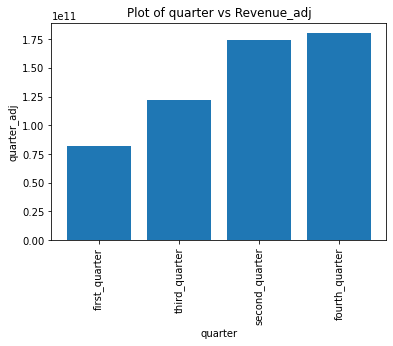

In [399]:
plt.bar(x=quarter_series.index,height=quarter_series.values)
plt.xlabel("quarter")
plt.ylabel("quarter_adj")
plt.title("Plot of quarter vs Revenue_adj")
plt.xticks(rotation=90)
plt.show()

<a id ="q3"></a>


# Are latest movies performing better than old releases

To answer this question, its important to classify the different release_year into groups.
the movie industry is a fast paced one, hence, changes occur very rapidly. they will be grouped in intervals of 5 years

In [250]:
year= df["release_year"]
cond_list =[year<1966,year<1971,year<1976,year<1981,year<1986,year<1991,year<1996,year<2001,year<2006,year<2011,year<2017]
choice_list=["early_60s","late_60s","early_70s","late_70s","early_80s","late_80s","early_90s","late_90s","early_2000","late_2000","early_2020s"]
df["period"] = np.select(cond_list,choice_list)

In [258]:
period_series=(df.groupby("period")["revenue_adj"].sum().sort_values(ascending=False))/100

In [259]:
period_series

period
early_2020s    1.165552e+09
late_2000      1.022027e+09
early_2000     9.004005e+08
late_90s       6.749585e+08
early_90s      5.102048e+08
late_80s       3.746863e+08
early_80s      2.622469e+08
late_70s       2.523524e+08
early_70s      1.824435e+08
early_60s      1.198847e+08
late_60s       1.164847e+08
Name: revenue_adj, dtype: float64

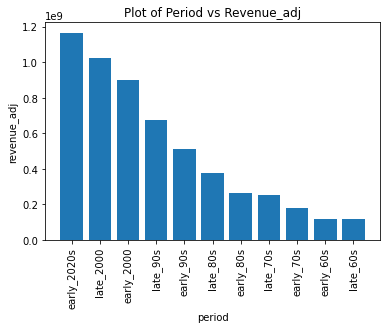

In [396]:
plt.bar(x=period_series.index,height=period_series.values)
plt.xlabel("period")
plt.ylabel("revenue_adj")
plt.title("Plot of Period vs Revenue_adj")
plt.xticks(rotation=90)
plt.show()

<a id = "q4"></a>

<a id = "q4"></a>

# Are more rated movies more successful than others

In [265]:
#Are more rated movies more successful than others
df["vote_average"].nunique()

72

the different rating is quite enormous, it will be better to classify them according to a given range

In [266]:
df["vote_average"].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

As the lowest point is 1.5 and highest value is 9.2, it will be easy to use a range of 0.5

In [274]:
rate= df["vote_average"]
cond_list =[rate<2.0,rate<2.6,rate<3.0,rate<3.6,rate<4.0,rate<4.6,rate<5.0,rate<5.6,rate<6.0,rate<6.6,rate<7.0,rate<7.6,rate<8.0,rate<8.6,rate<9.0,rate>8.9]
choice_list=["1s","early_2s","late_2s","early_3s","late_3s","early_4s","late_4s","early_5s","late_5s","early_6s","late_6s","early_7s","late_7s","early_8s","late_8s","9s"]
df["rating"] = np.select(cond_list,choice_list)

In [275]:
rate_series=(df.groupby("rating")["revenue_adj"].sum().sort_values(ascending=False))/100

In [277]:
rate_series

rating
early_6s    1.670585e+09
early_7s    1.187968e+09
late_6s     9.552880e+08
late_5s     7.464441e+08
early_5s    4.742565e+08
late_7s     3.366063e+08
early_8s    8.898759e+07
late_4s     7.626627e+07
early_4s    3.623072e+07
late_3s     6.370666e+06
early_3s    2.132017e+06
early_2s    1.058622e+05
1s          0.000000e+00
9s          0.000000e+00
late_2s     0.000000e+00
late_8s     0.000000e+00
Name: revenue_adj, dtype: float64

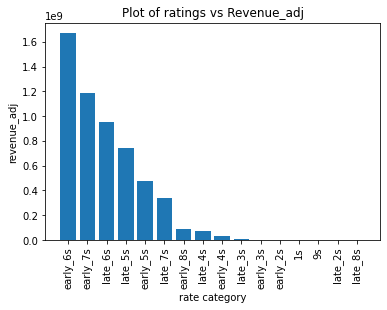

In [278]:
plt.bar(x=rate_series.index,height=rate_series.values)
plt.xlabel("rate category")
plt.ylabel("revenue_adj")
plt.title("Plot of ratings vs Revenue_adj")
plt.xticks(rotation=90)
plt.show()

In [280]:
df["vote_average"].corr(df["revenue_adj"])

0.19306239300279385

<a id = "conclusion"></a>
# Conclusion 

From the above analysis it can be deduced that
1. the most popular genres are "action","adventure","comedy","drama"
2. The properties that influence revenue are
    1."popularity"
    2."vote_count"
    3."budget_adj"

3. More recent movies are making more revenues compared to their older counterpart
4. From the plot and correlation value, it is obvious that there is no relationship between rating and revenue